# Wine Quality

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1. Load the red wine quality data set (red wine quality.csv), name the data frame as ‘wine’.

In [7]:
wine = pd.read_csv('red wine quality.csv')

### 2. Find the shape and columns of the data frame wine. Print the first 10 rows.

In [8]:
print(wine.shape)
print(wine.columns)

print(wine.head(10))

(1599, 12)
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2

### 3. Show the summary statistics of the data frame wine.

In [9]:
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### 4. Delete the rows with missing data in the data frame wine.

In [10]:
wine.dropna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 5. Plot a histogram for each numeric variable, and save the figure as ‘histogram.png’.

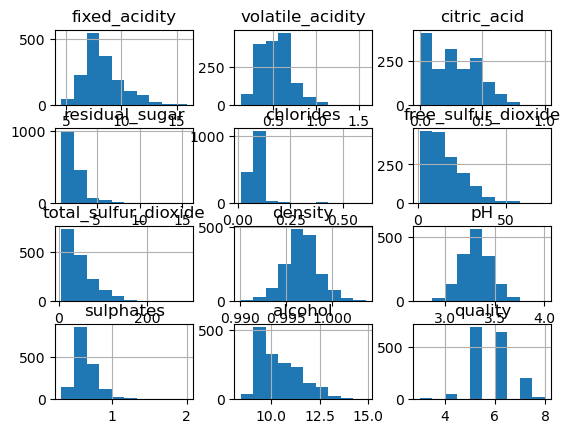

In [11]:
wine.hist()
plt.savefig('histogram.png')
plt.show()

### 6. Create a scatter plot of pH and alcohol with color= quality. Save the figure as ‘scatter plot.png’.

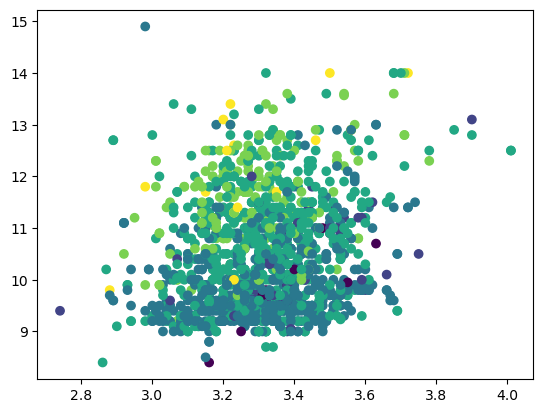

In [12]:
plt.figure()
plt.scatter(wine.pH,wine.alcohol,c=wine.quality)
plt.savefig('scatter plot.png')
plt.show()

### 7. Define a function called ‘quality_level’ to find the level of a wine quality: if quality= 3 or 4, quality_level=poor; if quality= 5 or 6, quality_level=fair; if quality=7 or 8, quality_level=good.

In [14]:
def quality_level(q):
    if q == 3 or q == 4:
        return 'poor'
    elif q == 5 or q == 6:
        return 'fair'
    else:
        return 'good'

### 8. Use the map function or design a for-loop to find the corresponding quality_level for the variable quality, add the new column called ‘quality_level’ to the data frame wine.

In [15]:
qLevel = map(quality_level, wine.quality)
qLevel = list(qLevel)
wine['quality_level'] = qLevel

### 9. Plot pie chart for quality_level. Save the figure as ‘quality pie chart.png’.

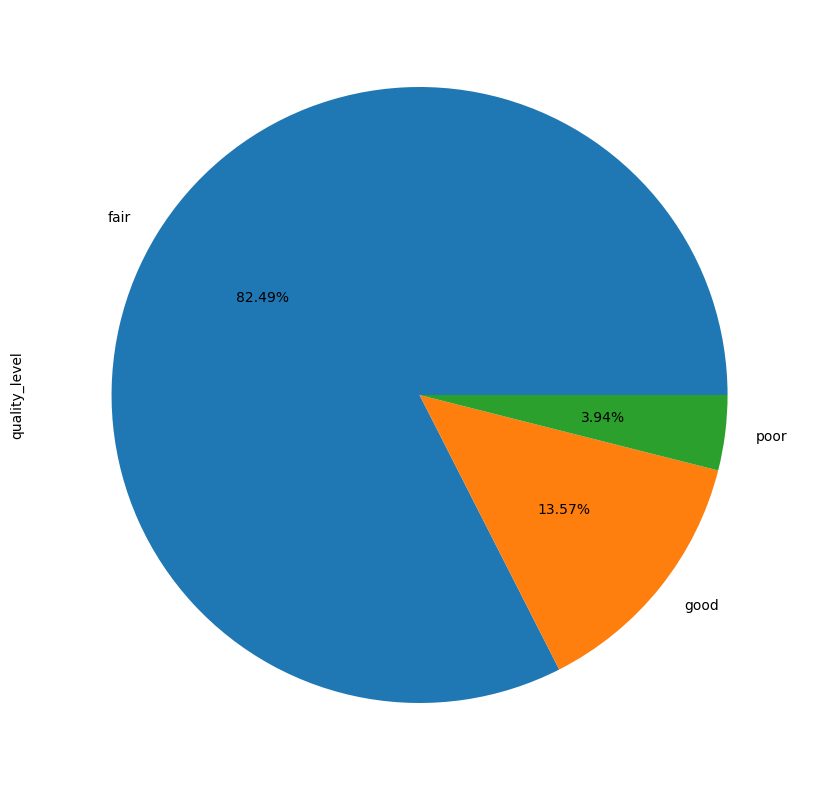

In [16]:
q_counts = wine.quality_level.value_counts()
plt.figure()
q_counts.plot.pie(figsize=(10,10), autopct='%1.2f%%', legend=False)
plt.savefig('quality pie chart.png')
plt.show()

### 10. Group the data frame wine by quality_level. Plot the bar chart of the mean of the grouped data. Save the figure as ‘bar chart.png’.

<Figure size 640x480 with 0 Axes>

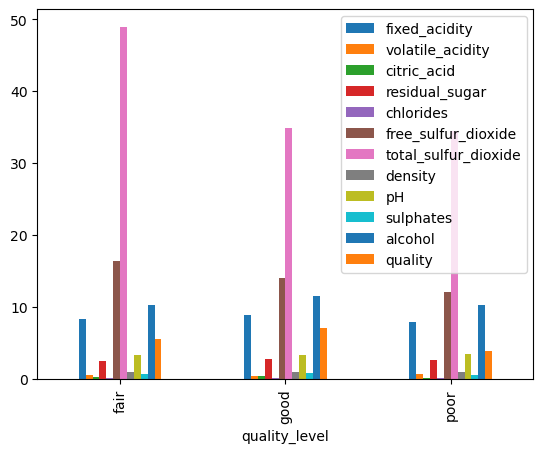

In [17]:
group_qLevel = wine.groupby('quality_level').mean()
plt.figure()
group_qLevel.plot.bar()
plt.savefig('bar chart.png')
plt.show()

### 11. Delete the variable quality_level from the data frame wine

In [18]:
wine = wine.drop('quality_level', axis=1)

### 12. Find the correlations of all the numeric variables in the data frame wine. Save the correlations to a file named ‘correlation.csv’. Visualize the correlation between variables. Save the figure as ‘scatter matrix.png’.

<Figure size 640x480 with 0 Axes>

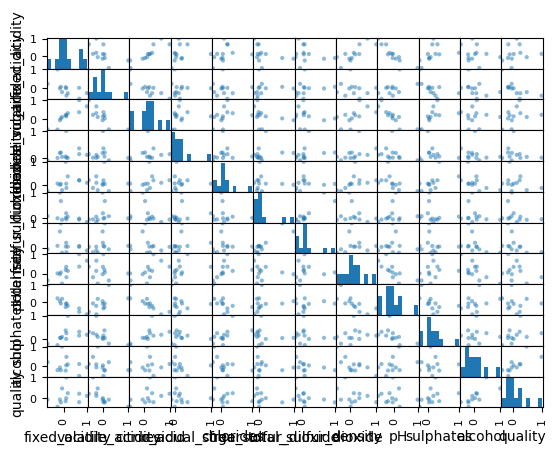

In [19]:
corrs = wine.corr()
corrs.to_csv('correlation.csv')
plt.figure()
pd.plotting.scatter_matrix(corrs)
plt.savefig('scatter matrix.png')
plt.show()

### 13. Shapiro-wilk test for normality of the variable density.

In [22]:
stat,p = stats.shapiro(wine.density)
print('Shapiro-wilk test')
print('statistics={0:.3f},p={1:.3f}'.format(stat,p))

alpha = 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0). P-value: ',p)
else:
    print('Sample does not look normal (reject H0) P-value: ',p)

Shapiro-wilk test
statistics=0.991,p=0.000
Sample does not look normal (reject H0) P-value:  1.9199848821926935e-08


### 14. Delete all the variables whose correlation absolute value with quality variable is less than 0.15.

In [23]:
colsToDel=[]
for col in corrs.columns:
    if abs(corrs[col]['quality']) < 0.15:
        colsToDel.append(col)

wine = wine.drop(colsToDel, axis=1)

### 15. Split the data frame wine. Let y denote the target variable quality; x denotes the predictor (all the variables except quality).

In [24]:
y = wine.quality
x = wine.drop('quality', axis=1)

### 16. Split the data into 75% of training set and 25% testing set.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2000)

### 17. Find the multiple linear regression model using the training set.

In [26]:
wine_quality = LinearRegression()
wine_quality.fit(x_train, y_train)
print('multiple_regression intercept =', wine_quality.intercept_)
for i, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, wine_quality.coef_[i]))

multiple_regression intercept = -12.771512224400098
The coefficient for volatile_acidity is -1.2330682522248726
The coefficient for citric_acid is -0.09829803536814877
The coefficient for total_sulfur_dioxide is -0.0021722463885605336
The coefficient for density is 15.379338988118965
The coefficient for sulphates is 0.777315509619736
The coefficient for alcohol is 0.320986080539312


### 18. Use the linear regression model wine_quality to find the predictive values for the testing data set. Calculate the R2, adjusted R2 and the root_mean_square_error.

In [27]:
y_predict = wine_quality.predict(x_test)
r_squared = wine_quality.score(x_test, y_test)
p=len(wine_quality.coef_)
n=len(y_test)
adjusted_r_squared = r_squared-(1-r_squared)*p/(n-p-1)
mse = mean_squared_error(y_predict, y_test)
rmse=np.sqrt(mse)

### 19. Give values for predictor variables and use the linear regression model wine_quality to predict the quality. How do you explain the predicted value considering the root_mean_square_error?

In [28]:
volatile_acidity_P = 0.7
citric_acid_P = 0
total_sulfur_dioxide_P = 34
density_P = 0.9978
sulphates_P = 0.56
alcohol_P = 9.4

prediction_values = [volatile_acidity_P,citric_acid_P,total_sulfur_dioxide_P,density_P,sulphates_P,alcohol_P]
y_predict = wine_quality.predict([prediction_values])
print(y_predict)

print('The predicted quality for these values is 5.0896. The RMSE of this model is 0.665, so the real Quality should be between 4.4246 and 5.7546, which makes sense for our data.')

[5.08955391]
The predicted quality for these values is 5.0896. The RMSE of this model is 0.665, so the real Quality should be between 4.4246 and 5.7546, which makes sense for our data.


/Users/mattejoey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 20. Create a data frame as a table to save R2, adjusted R2, the root_mean_square_error, and the predicted value from part 19. Save it as ‘predicted value.csv’.

In [32]:
data = {'R squared' : r_squared, 'Adjusted R squared' : adjusted_r_squared, 'root_mean_square_error' : rmse, 'predicted value' : y_predict}
df = pd.DataFrame(data)
print(df)
df.to_csv('predicted value.csv')

   R squared  Adjusted R squared  root_mean_square_error  predicted value
0   0.298002            0.287284                0.665128         5.089554
